### Preço de imóveis

**Objetivo:** estimar os preços de imóveis.
- Identificar aspectos que contribuem para a precificação dos imóveis.
- Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
- Precificar um imóvel novo.

In [1181]:
import pandas as pd

df = pd.read_csv('Preços_de_casas.csv')
df.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [1182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [1183]:
df.shape

(1438, 8)

In [1184]:
# A coluna Id não é tão importante para nós neste momento, então removemos do nosso dataset
df.drop('Id', axis=1, inplace=True)

### Análise Exploratória

Existem alguns fatores que podem estar atrelados ao preço de vendas das casas.

Podemos ver o quão correlacionados estão com o preço.

Para medirmos essa correlação podemos utilizar a métrica "correlação" (corr).

In [1185]:
# Cálculo da correlação
corr = df.corr()

# Exibindo a correlação do "preço_de_venda"
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

**Intensidade:** é a "força" da relação entre as variáveis medidas. Pode variar de -1 a +1, onde -1 indica uma correlação perfeitamente negativa, +1 indica uma correlação perfeitamente positiva e 0 indica ausência de correlação linear.

**Direção:** É a natureza da relação entre as variáveis medidas. Uma correlação positiva indica que as variáveis aumentam ou diminuem juntas, enquanto uma correlação negativa indica que uma variável aumenta enquanto a outra diminui, ou vice versa.

Por exemplo, no caso do nosso dataset, a correlação linear entre *area_primeiro_andar* e *preco_de_venda* é uma **correlação positiva moderadamente forte (intensidade)**. Em outras palavras, a medida que a area do primeiro andar aumenta, o preço de vendas também tende a aumentar (direção).

<Axes: >

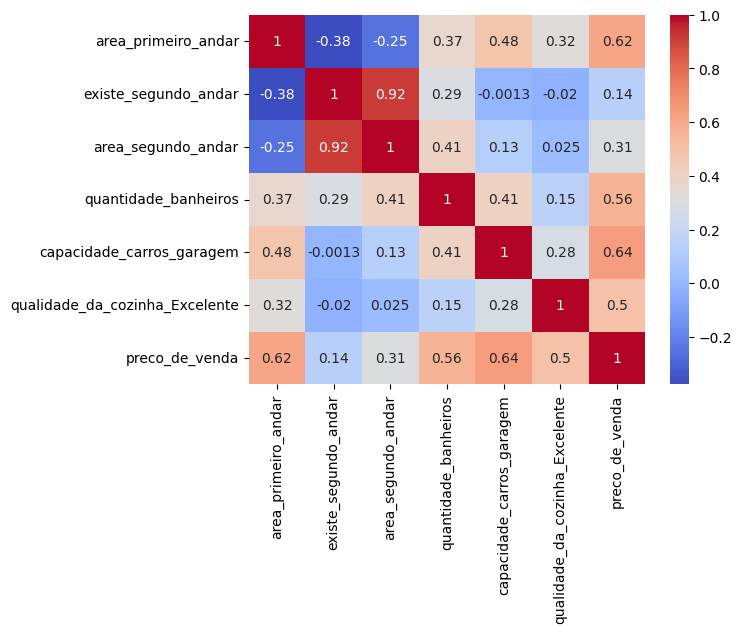

In [1186]:
# Visualização da correlação
import seaborn as sns

sns.heatmap(corr, annot=True, cmap='coolwarm')

**OBS.** É importante notar que a **correlação não implica causalidade**, ou seja, não podemos afirmar que o aumento no preço de venda é causado especificamente pelo aumento na área do primeiro andar apenas com o uso da correlação, mas sim que esses fatores estão relacionados entre si.

Podemos visualizar essa relação entre as variáveis com um **Gráfico de Dispersão**.

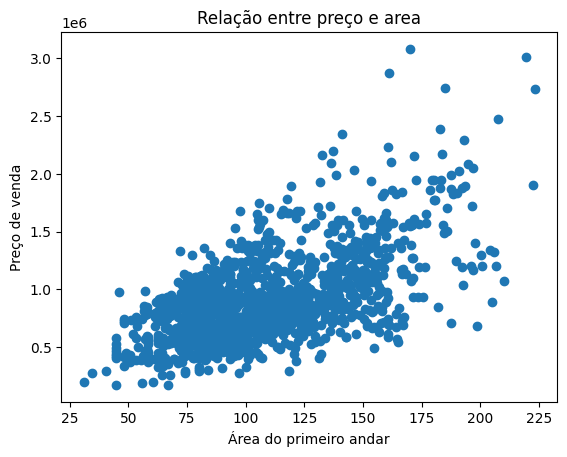

In [1187]:
import matplotlib.pyplot as plt

# Gráfico de dispersão da área do primeiro andar com o preço de venda
plt.scatter(x=df['area_primeiro_andar'], y=df['preco_de_venda'])
plt.title("Relação entre preço e area")
plt.xlabel("Área do primeiro andar")
plt.ylabel("Preço de venda")
plt.show()

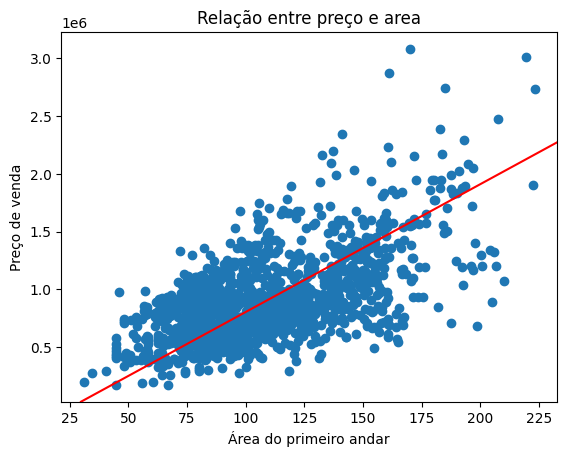

In [1188]:
# Para exibir uma linha reta de forma manual no gráfico podemos utilizar a função "axline"
plt.scatter(x=df['area_primeiro_andar'], y=df['preco_de_venda'])
plt.title("Relação entre preço e area")
plt.xlabel("Área do primeiro andar")
plt.ylabel("Preço de venda")

# Porém desta forma manual ainda não temos uma reta que mais se ajusta aos dados
plt.axline(xy1 = (50,250000), xy2=(190,1800000), color='red')

plt.show()

Para obtermos uma reta que melhor se ajuste aos dados, iremos utilizar a biblioteca *plotly* com a metodologia da **Regressão Linear**.

Essa reta é chamada de *Linha de Tendência*.

O parâmetro *trendline* é usado para adicionar uma linha de tendência (ou linha de regressão) ao gráfico de dispersão.

In [1189]:
# Necessário instalar o plotly + statsmodels
import plotly.express as px

# Qual a reta que melhor se adequa a relação?
px.scatter(df, x='area_primeiro_andar', y='preco_de_venda',
           trendline='ols', # Isto serve para criar a linha que melhor se adequa à relação
           trendline_color_override='red') # Cor da melhor linha

A partir dessa representação, conseguimos explicar o preço de venda a partir da area do primeiro andar

A *area_primeiro_andar* é a váriavel independente ou explicativa (**X**).

O *preco_de_venda* é a variável dependente ou resposta (**Y**).

array([[<Axes: title={'center': 'preco_de_venda'}>]], dtype=object)

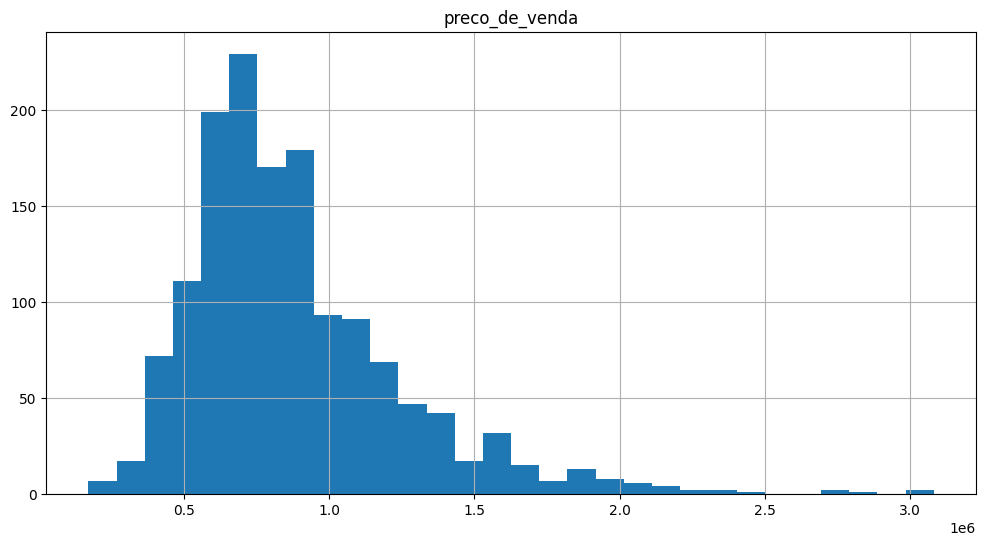

In [1190]:
# Histograma para visualizar a distribuição dos valores de preço de venda
df.hist(column='preco_de_venda', bins=30, figsize=(12,6))

Text(0.5, 1.0, 'Distribuição do preço de venda')

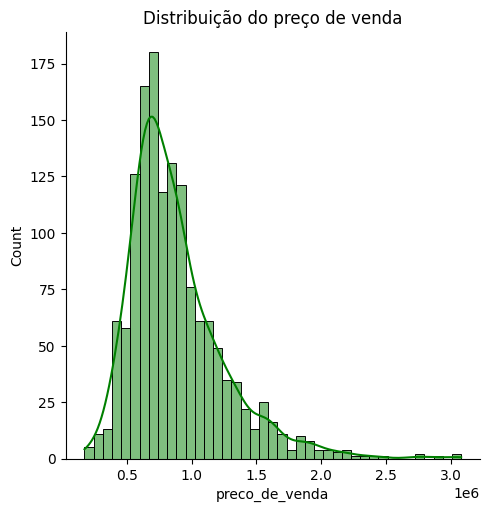

In [1191]:
# Um histograma semelhante ao de cima, porém utilizando a biblioteca Seaborn
sns.displot(df['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')

# o kde=True cria uma linha curva que suaviza os dados, mostrando a forma da distribuição com mais clareza
# Densidade de kernel (Kernel Density) nos ajuda a visualizar a distribuição do preço de venda das casas
# Mostrando se ela é simétrica ou não

Acima conseguimos identificar uma assimetria nos dados. Temos alguns imóveis cujo preço de venda está longe do comportamento mediano, ou seja, a presença de valores muito altos sugere a existência de propriedades de alto valor, em comparação com a maioria das outras propriedades no conjunto de dados.

A maior parte dos valores das casas estão entre 0.6 e 0.9 aproximadamente.

Eixo x é o valor e o eixo y é a quantidade de ocorrências.

### Dividindo os dados entre treino e teste

In [1192]:
X = df.drop('preco_de_venda', axis=1)
y = df['preco_de_venda']

In [1193]:
# Aplicando o split para separação dos dados entre treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

### Treinando o modelo com Statsmodels

O *statsmodels* é recomendado caso queira realizar mais uma análise estatística detalhada ou entender melhor o modelo e a relação entre as variáveis. Fornece informações amis detalhadas sobre o ajuste do modelo. (Parecido com algumas bibliotecas da linguagem R).

In [1194]:
# Para ajustar o nosso primeiro modelo iremos utilizar a biblioteca statsmodels
from statsmodels.formula.api import ols

# Porém, antes de treinarmos o modelo, iremos criar um dataframe com os dados de treino
df_train = pd.DataFrame(X_train)
df_train['preco_de_venda'] = y_train

# Relação entre preço_de_venda e (~) area_primeiro_andar
model = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit() # Treinamos o modelo com o método fit()

In [1195]:
# Visualizando os parametros
model.params

Intercept              152909.288334
area_primeiro_andar      6793.641641
dtype: float64

**O que esses valores significam?**

A linha **Intercept** significa o valor do *preço_de_venda* no caso da *area_primeiro_andar* for zero, onde no caso seria de R$ 145.397,30.

A linha da **area_primeiro_andar** significa que em média quando aumenta 1m² da área do primeiro andar espera-se que o valor da casa aumente no valor de R$ 6905.95.

Esses valores representam o efeito quantitativo da variável explicativa (area_primeiro_andar) sobre a variável de resposta (preço_de_venda).

In [1196]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          2.22e-105
Time:                        19:57:35   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

### Explicabilidade do Modelo

Quanto a variação da área está explicando os diversos preços das casas?

Nesse caso, recorremos a métrica **R²**, o **coeficiente de determinação**. O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente (resposta) são explicadas pelas variáveis independentes (caracteristicas) do modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente (resposta).

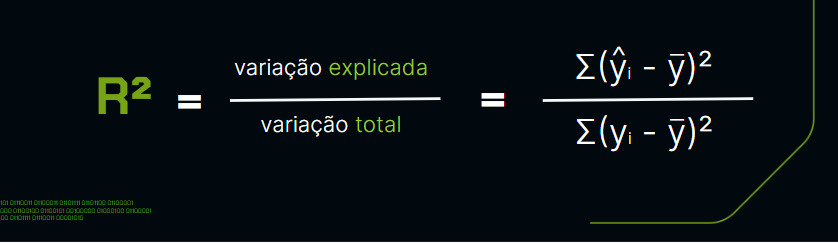

In [1197]:
# Interpretando o R²
model.rsquared

# 37% das diferenças dos preços da casa é explicado pelo "area_primeiro_andar"
# Porém, aproximadamente 62% não está sendo explicado por essa variável, que pode ser explicado por outros fatores

np.float64(0.3772801099429788)

### Entendendo o Resíduo

A diferença do que esta sendo observado (dados reais) e estimado pela reta se chama resíduo.

Para que um modelo seja considerado preciso é necessário que os resíduos sejam próximos de zero. É isto que a teoria da regressão linear espera que seja encontrado no comportamento da distribuição dos resíduos. Onde a diferença do que observamos (dados reais) e estimados pelo modelo sejam próximos de zero.

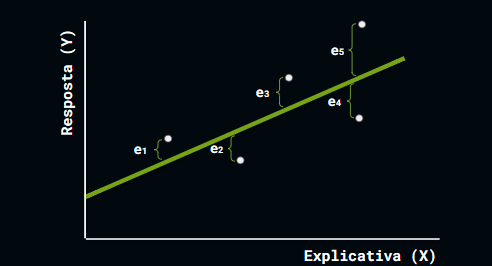

A diferença entre os dados reais e estimados pela reta se chama resíduo.

In [1198]:
model.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

Text(0.5, 1.0, 'Distribuição de Resíduos')

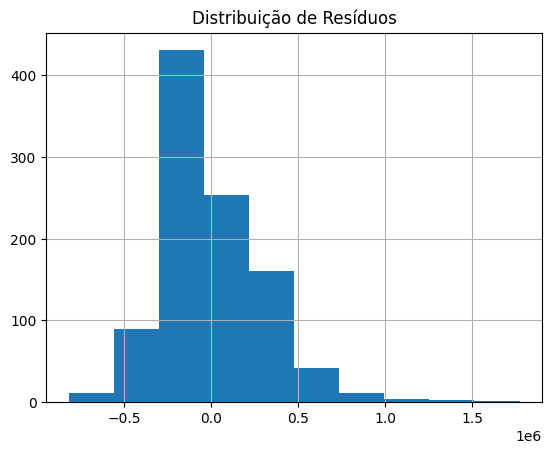

In [1199]:
model.resid.hist()
plt.title("Distribuição de Resíduos")

O formato de sino (ou torre) ideal deve ser concentrada bem próximos de zero.

### Obtendo o R² da previsão

In [1200]:
# Importamos a métrica r2_score para fazer a comparação do que é real e do que foi previsto
from sklearn.metrics import r2_score

y_predict = model.predict(X_test)

r2 = r2_score(y_test, y_predict)
print('R²: ', r2)

R²:  0.38530928723202407


### Adicionando outros fatores **(Regressão Linear Multipla)**

Como vimos anteriormente, apenas os valores de *area_primeiro_andar* não são suficientes para explicar a variação dos preços das casas, pois o R² está aproximadamente em 37%, ou seja, ainda há 62% que não estão sendo explicados. Precisamos analisar nossa base de dados para verificar quais outros dados também influnciam no preço de venda das casas.

**Como analisar a relação de outros fatores?**

Iremos analisar os dados com uma função do Seaborn chamada **pairplot**, onde a função irá cruzar todas as variáveis (fatores) entre si e irá exibir um par de gráficos para cada uma das variáveis. Ou seja, irá exibir gráficos de dispersão para cada variável para analisarmos suas relações.

Essa função evita que façamos um gráfico de dispersão para cada um, onde esta função realiza o cruzamento das variáveis com apenas um comando.

In [1201]:
# Quais outras características poderiam explicar o preço dos imóveis?
#sns.pairplot(df)

Vamos olhar apenas para a relação com o preço de venda, para isto, utilizaremos o parametro **y_vars**.

Também podemos realizar um gráfico customizado e exibir apenas a relação de algumas variáveis com o preço de venda como podemos ver abaixo.

O **pairplot** é uma ferramenta valiosa para analisar a relação das variáveis.

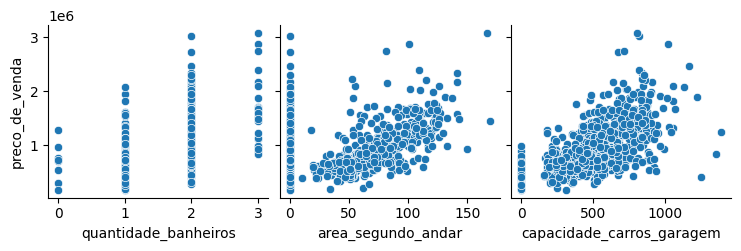

In [1202]:
sns.pairplot(df, y_vars='preco_de_venda', x_vars=['quantidade_banheiros', 'area_segundo_andar', 'capacidade_carros_garagem'])

### Adicionando outros fatores ao modelo

Antes, iremos adicionar uma constante **(intercepto)** ao modelo de regressão. Esse intercepto é essencial em modelos de regressão linear para permitir que a linha de regressão não seja forçada a passar pela origem (ponto 0,0).

Essa coluna nova que a função *add_constant* cria para todas as linhas é o intercepto que permite ao modelo encontrar um valor y (variável dependente) quando x == 0 (quando a variável independente é zero).

In [1203]:
import statsmodels.api as sm

# Adicionando uma constante
X_train = sm.add_constant(X_train)
X_train.head() # Adicionou 1 em todas as linhas

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [1204]:
# Criando o modelo de regressão (sem fórmula): saturado (que tem todas as informações)
model_1 = sm.OLS(y_train, X_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          2.79e-289
Time:                        19:57:36   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [1205]:
# Criando o modelo sem a area_segundo_andar
model_2 = sm.OLS(y_train, X_train.drop('area_segundo_andar', axis=1)).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          1.93e-264
Time:                        19:57:36   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [1206]:
# Criando o modelo sem a area_segundo_andar e capacidade_carros_garagem
model_3 = sm.OLS(y_train, X_train.drop(['area_segundo_andar','capacidade_carros_garagem'], axis=1)).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          4.15e-227
Time:                        19:57:36   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Comparando modelos

Qual o melhor modelo?

In [1207]:
print("Modelo 0: ", model.rsquared, "Qtd de parametros: ", len(model.params))
print("Modelo 1: ", model_1.rsquared, "Qtd de parametros: ", len(model_1.params))
print("Modelo 2: ", model_2.rsquared, "Qtd de parametros: ", len(model_2.params))
print("Modelo 3: ", model_3.rsquared, "Qtd de parametros: ", len(model_3.params))

Modelo 0:  0.3772801099429788 Qtd de parametros:  2
Modelo 1:  0.7414024156090393 Qtd de parametros:  7
Modelo 2:  0.7081440416220739 Qtd de parametros:  6
Modelo 3:  0.6511289354898803 Qtd de parametros:  5


**OBS.** Quando temos mais de uma variável que diz sobre a mesma coisa no dataset e rodamos a função *modelo.summary()*, no final do resumo há algumas notas sobre que alguns dados presentes podem indicar que há forte multicolinearidade, ou seja, indica que duas ou mais variáveis independentes (características) estão altamente correlacionadas.

O erro que aparece nas notas traduzido:

[2] O número de condição é grande, 2,6e+03. Isso pode indicar que há
forte multicolinearidade ou outros problemas numéricos.

O número de condição que este aviso se refere é o Condition Number (aparece como *Cond. No*).

**Melhor modelo:**

O único modelo que não ocorre a multicolinearidade é o modelo 3, portanto, é o nosso melhor modelo. **O valor do R² não é a única característica que define se um modelo é melhor ou não.**

Para definirmos o melhor modelo fizemos a comparação manualmente, porém, existe formas automáticas de realizar este processo, como métodos **stepwise**, **backward** e **forward selection**.

- O método **forward** selection começa com um modelo sem variáveis explicativas e adiciona uma a uma, escolhendo em cada passo a variável que mais melhora o modelo de acordo com um critério estatístico específico, como o menor valor de p-valor ou o maior aumento no R² ajustado.

- O **backward selection** inicia com todas as variáveis possíveis no modelo e, iterativamente, remove a variável que menos contribui para o modelo, novamente baseando-se em critérios como o p-valor ou o impacto no R² ajustado.

- O **stepwise selection** é uma combinação dos dois métodos anteriores, onde as variáveis podem ser adicionadas ou removidas em cada passo, dependendo de sua contribuição para o melhoramento do modelo.

### Analisando os efeitos

In [1208]:
model_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

- A cada metro quadrado da variável *area_primeiro_andar* é somado aproximadamente R$ 6119,00.

- Se existir segundo andar, espera-se que o preço de venda do imóvel aumente em média R$ 221306,95.

- A cada quantidade de banheiros, espera-se que aumente em média R$ 149036,28.

- E por fim, se a qualidade do banheiro for excelente, espera-se que o preço do imóvel aumente em média R$ 444391,22.

**Efeitos Isolados:**

Em um cenário hipotético, vamos supor que você precise vender seu imóvel e é necessário escolher entre reformar a cozinha para que fique excelente ou construir um segundo andar.

Baseado nos efeitos desse modelo, reformar a cozinha para que fique excelente pode somar mais no preço de venda do imóvel do que construir um segundo andar.

### Obtendo o R² da Regressão com o novo modelo

In [1209]:
# Primeiramente iremos adicionar a constante (intercepto) no X_test, pois também há no X_train
X_test = sm.add_constant(X_test)

# Para testar o modelo, precisamos remover os mesmos dados que removemos anteriormente no treinamento do modelo
y_model_3_predict = model_3.predict(X_test.drop(['area_segundo_andar','capacidade_carros_garagem'], axis=1))

print("R² Score: ", r2_score(y_test, y_model_3_predict))

R² Score:  0.6432078074497707


In [1210]:
# A quantidade de residuos diminuiu um pouco comparado com o modelo zero
model_3.resid

1303    -14840.784163
326    -194658.976419
386     213463.451718
615     135279.777275
236      -6989.862248
            ...      
777     299947.554523
271    -410640.655071
723     281074.420982
560    -447470.170027
768     165805.871959
Length: 1006, dtype: float64

**Testando com uma nova casa:**

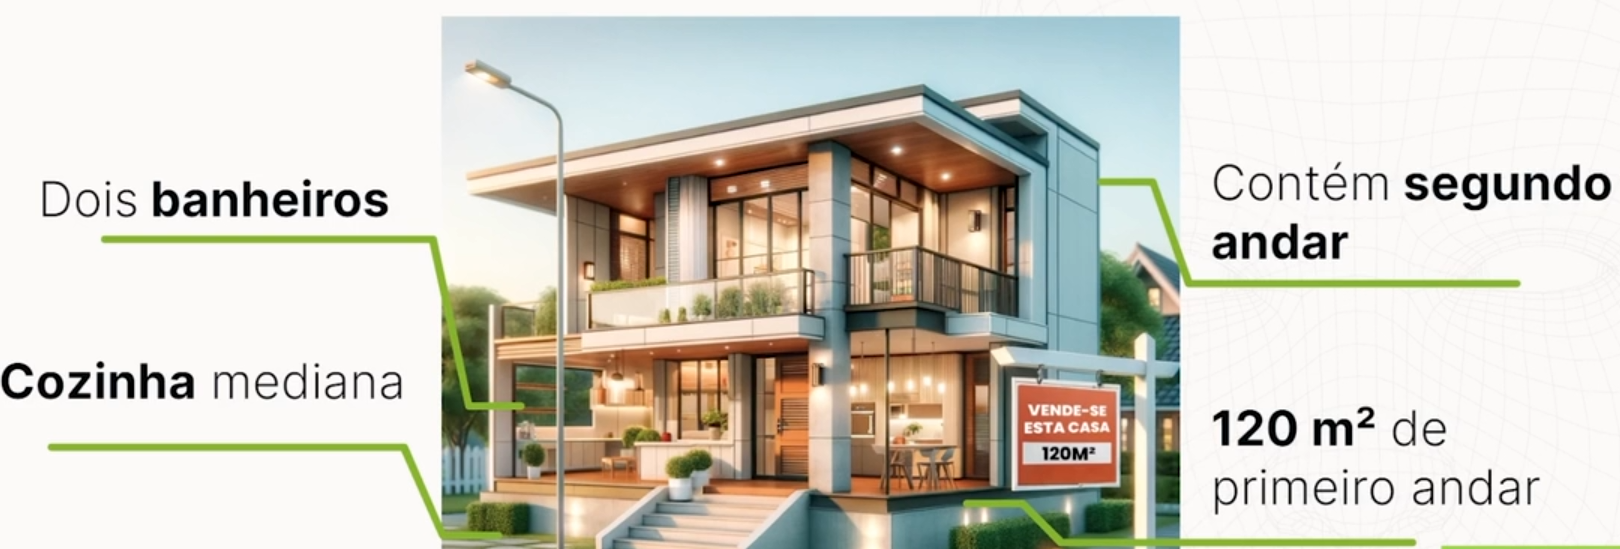

In [1211]:
# Novo imóvel
new_house = pd.DataFrame({
    'const': [1],
    'area_primeiro_andar': [120],
    'existe_segundo_andar': [1],
    'quantidade_banheiros': [2],
    'qualidade_da_cozinha_Excelente': [0]
})

In [1212]:
# Prever o preço com o modelo 0, com apenas os dados de "area_primeiro_andar"
y_predict = model.predict(new_house['area_primeiro_andar'])
y_predict

0    968146.285305
dtype: float64

In [1213]:
# Prever o preço do imóvel com o modelo 3

y_predict = model_3.predict(new_house)
print(f'Preço do Imóvel: R$ {y_predict[0]:.2f}')

Preço do Imóvel: R$ 1123758.24


**Agora iremos realizar a predição de várias casas de uma vez**

In [1214]:
df2 = pd.read_csv('novas_casas.csv', sep=';')
df2.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [1215]:
# Remove a coluna "Casa", pois não é necessário para nós no momento
df2 = df2.drop('Casa', axis=1)

# Adicionamos a constante (intercepto)
df2 = sm.add_constant(df2) # Para permitir que o modelo encontre um valor de y quando X for igual à zero

y_predict = model_3.predict(df2)
y_predict

0    1.751739e+06
1    1.863058e+06
2    1.568149e+06
3    2.206758e+06
4    1.591629e+06
5    1.246151e+06
6    1.357470e+06
7    1.552134e+06
8    9.636478e+05
9    1.639974e+06
dtype: float64

### Salvando o modelo com Pickle

In [1216]:
import pickle

filename = 'modelo_regressao_linear.pkl'

# Salva o modelo em um arquivo usando Pickle
with open(filename, 'wb') as file:
    pickle.dump(model_3, file)

# Para carregar o modelo
with open(filename, 'rb') as file:
    model_file = pickle.load(file)

# Realizando a mesma previsão anterior com o arquivo carregado
y_predict = model_file.predict(df2)
y_predict

0    1.751739e+06
1    1.863058e+06
2    1.568149e+06
3    2.206758e+06
4    1.591629e+06
5    1.246151e+06
6    1.357470e+06
7    1.552134e+06
8    9.636478e+05
9    1.639974e+06
dtype: float64

### Investigando a Multicolinearidade

A multicolinearidade indica que duas ou mais variáveis independentes (características) estão altamente correlacionadas.

Iremos analisar a multicolinearidade com a função *variance_inflation_factor* da bilioteca **Statsmodels**.

In [1217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Primeiramente iremos pegar os nomes de cada coluna que treinamos nossos modelos

# Modelo 1:
model_1_columns = X_train.columns

# Modelo 3 (modelo escolhido):
model_3_columns = X_train.drop(['area_segundo_andar', 'capacidade_carros_garagem'], axis=1).columns

In [1218]:
vif_1 = pd.DataFrame()
vif_1['variavel'] = model_1_columns

vif_1['vif'] = [variance_inflation_factor(X_train, i) for i in range(len(model_1_columns))]
vif_1

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


É possível observar que "existe_segundo_andar" e "área do segundo andar" estão com o VIF maior que 5. Quando isso acontece, indica que estas duas variáveis podem estar correlacionadas entre si, e pode ser que o efeito estabelecido dentro do modelo esteja se confundido, já que elas são, na verdade, a mesma coisa. Portanto, neste primeiro modelo, existe a multicolinearidade.

Da mesma forma que fizemos o VIF para o modelo 1, iremos fazer para o nosso modelo escolhido, o modelo 3.

In [1219]:
vif_3 = pd.DataFrame()
vif_3['variavel'] = model_3_columns

vif_3['vif'] = [variance_inflation_factor(X_train[model_3_columns], i) for i in range(len(model_3_columns))]
vif_3

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


Agora com os dados do modelo 3, é possível observar que o valor VIF diminuiu consideravelmente quando olhamos para as variáveis explicativas (variáveis independentes).